In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [6]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

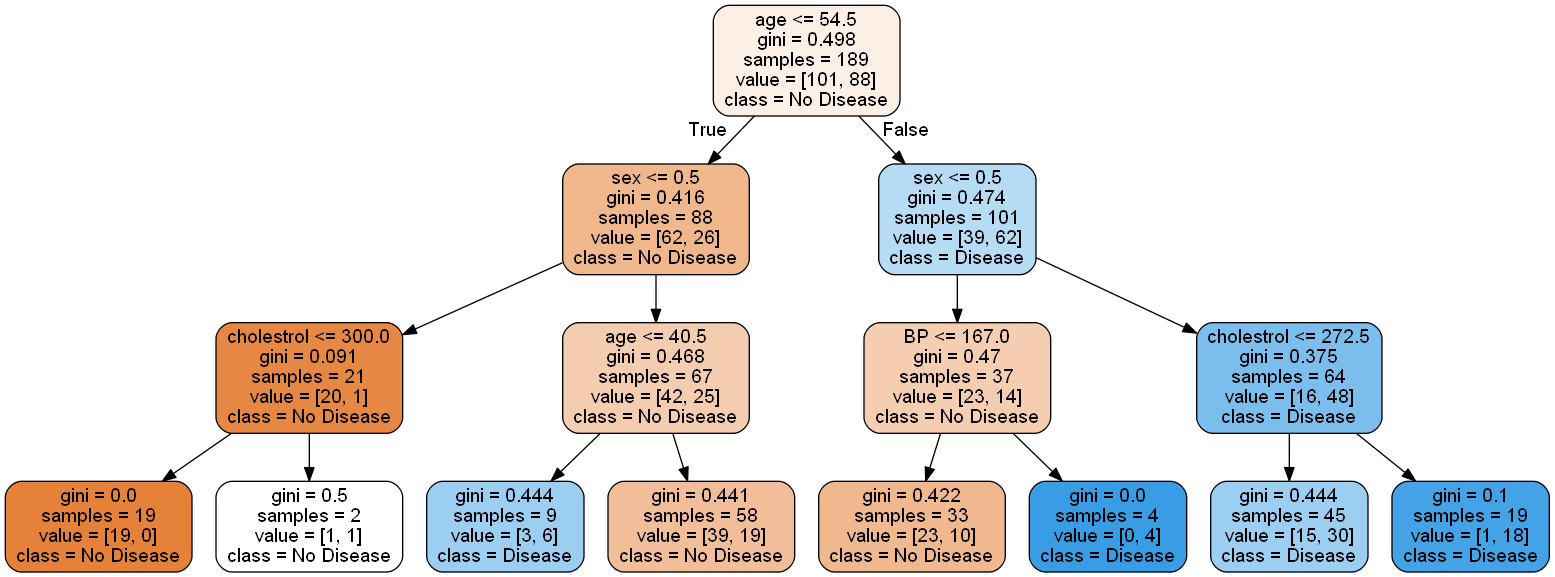

In [12]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

[Text(1674.0, 1426.95, 'age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]\nclass = No Disease'),
 Text(837.0, 1019.25, 'sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]\nclass = No Disease'),
 Text(418.5, 611.55, 'cholestrol <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = No Disease'),
 Text(209.25, 203.8499999999999, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = No Disease'),
 Text(627.75, 203.8499999999999, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No Disease'),
 Text(1255.5, 611.55, 'age <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]\nclass = No Disease'),
 Text(1046.25, 203.8499999999999, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = Disease'),
 Text(1464.75, 203.8499999999999, 'gini = 0.441\nsamples = 58\nvalue = [39, 19]\nclass = No Disease'),
 Text(2511.0, 1019.25, 'sex <= 0.5\ngini = 0.474\nsamples = 101\nvalue = [39, 62]\nclass = Disease'),
 Text(2092.5, 611.55, 'BP <= 167.0\ngini = 0.47\nsamples = 37\nvalue = [23, 14

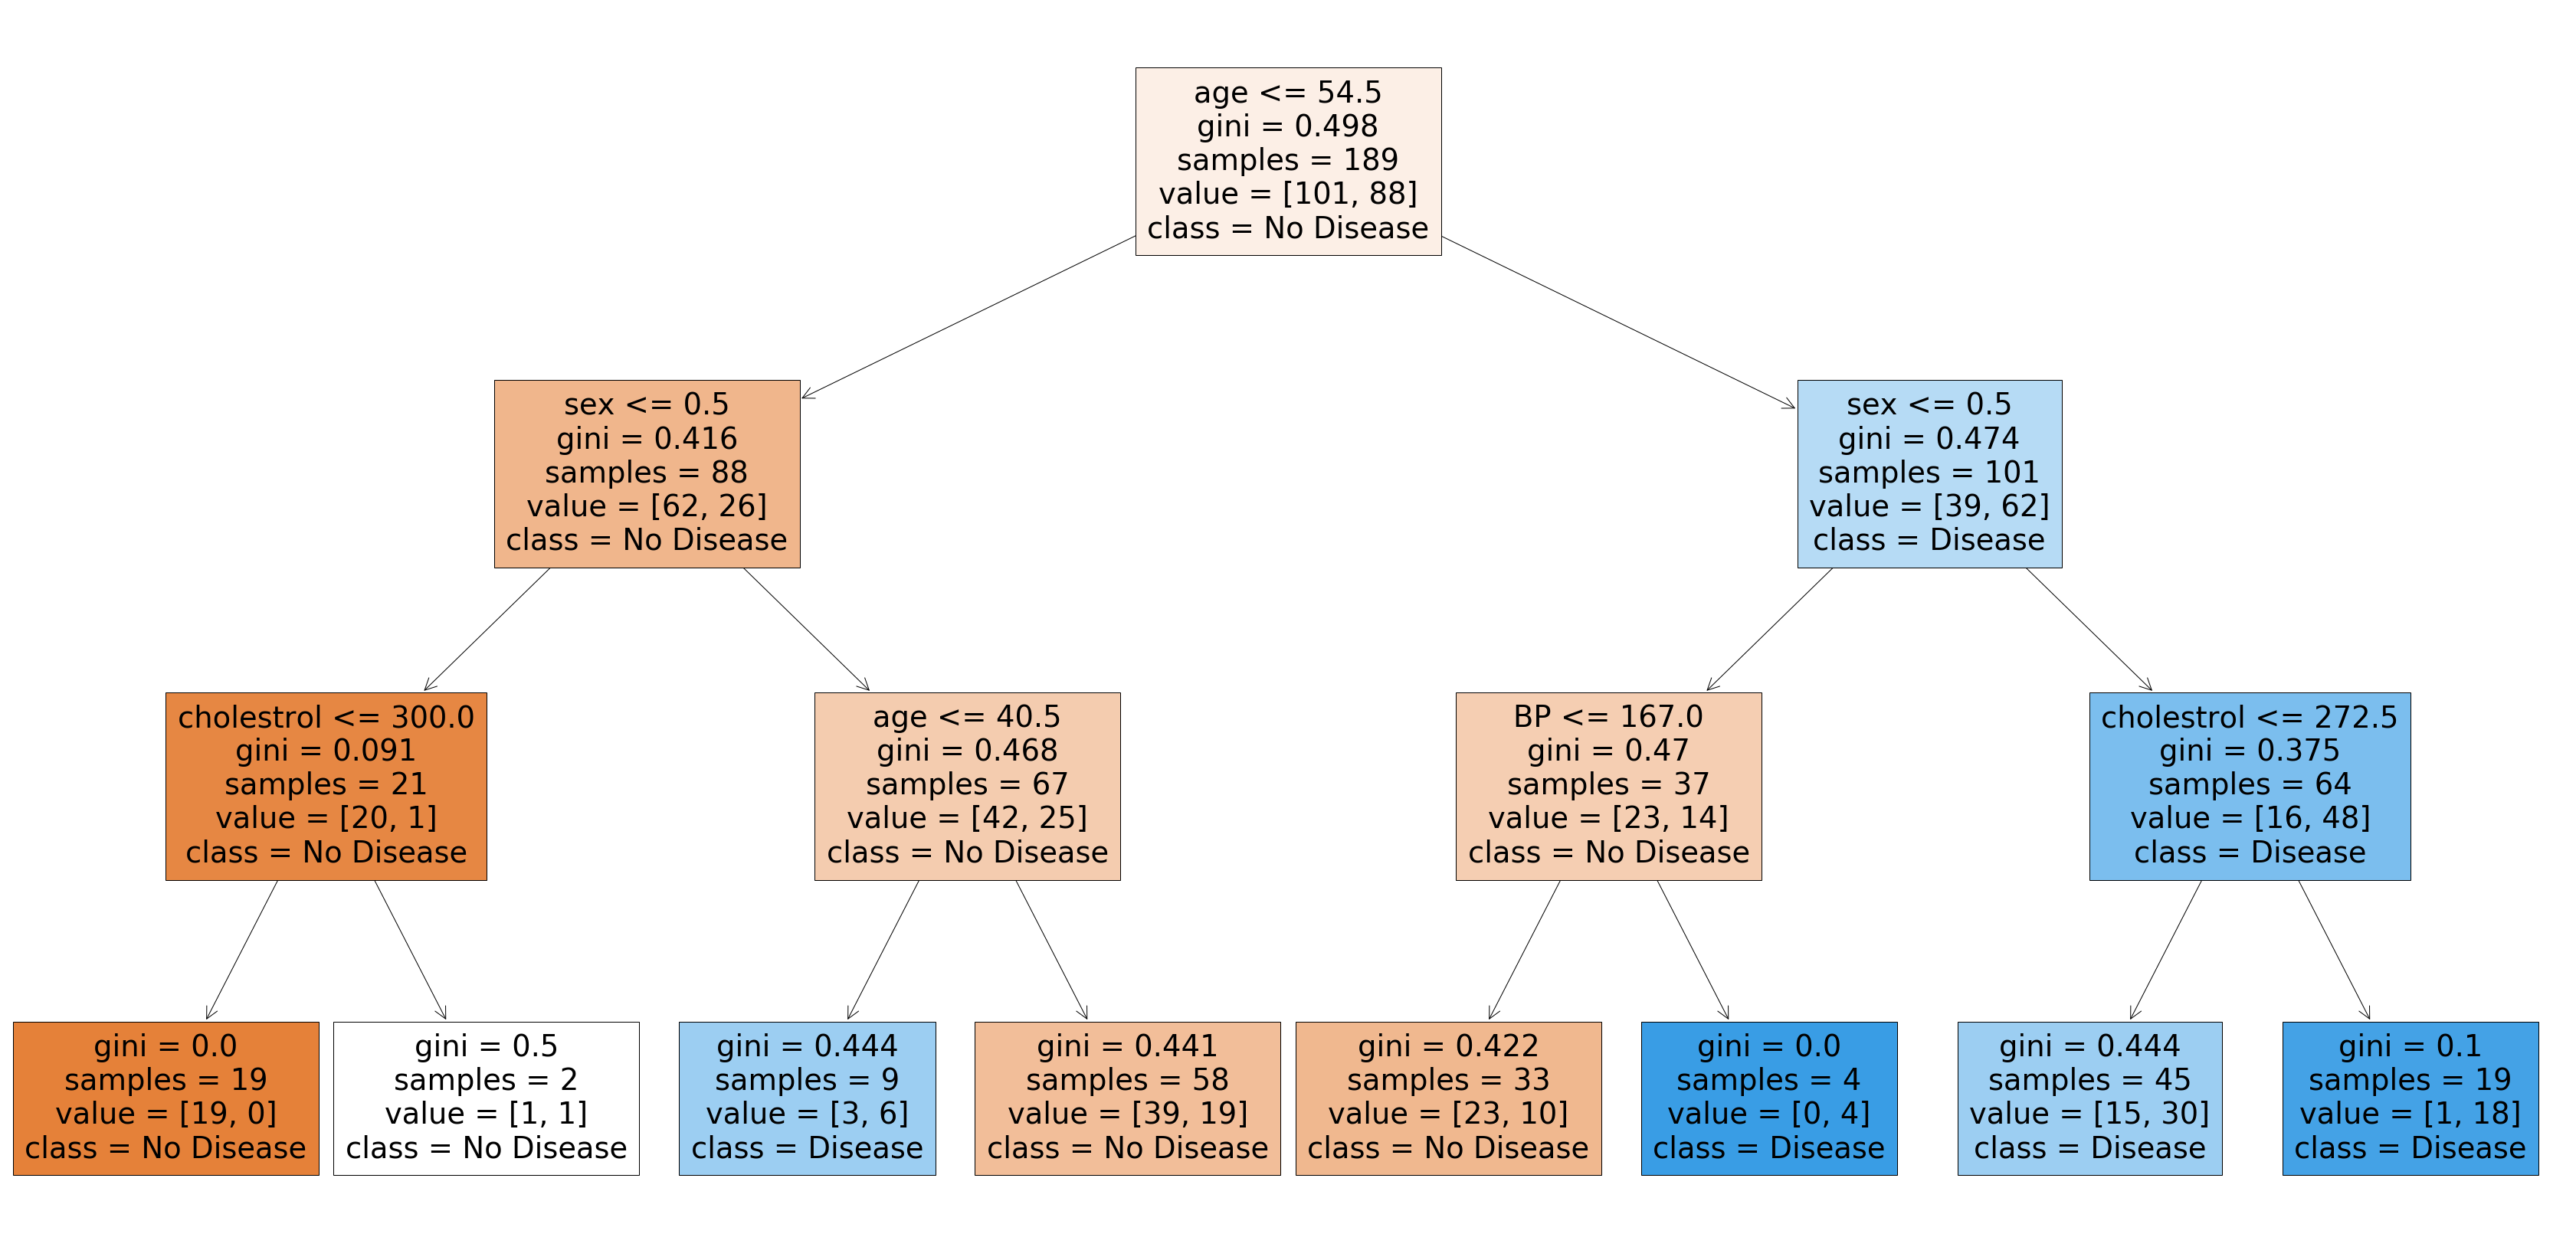

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names= X.columns, class_names=['No Disease','Disease'],filled=True)

#### Evaluating model performance

In [13]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [16]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)